In [1]:
### importamos las librerías necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
### Importando datos desde un archivo csv
decesos_csv = pd.read_csv('https://raw.githubusercontent.com/mauforonda/covid19-bolivia/master/decesos.csv',parse_dates=['Fecha'], index_col=['Fecha'])
recuperados_csv = pd.read_csv('https://raw.githubusercontent.com/mauforonda/covid19-bolivia/master/recuperados.csv',parse_dates=['Fecha'], index_col=['Fecha'])
confirmados_csv = pd.read_csv('https://raw.githubusercontent.com/mauforonda/covid19-bolivia/master/confirmados.csv',parse_dates=['Fecha'], index_col=['Fecha'])


In [4]:
### Haciendo un reverse de los resultados obtenidos
decesos_csv = decesos_csv.reindex(index=decesos_csv.index[::-1])
recuperados_csv = recuperados_csv.reindex(index=recuperados_csv.index[::-1])
confirmados_csv = confirmados_csv.reindex(index=confirmados_csv.index[::-1])

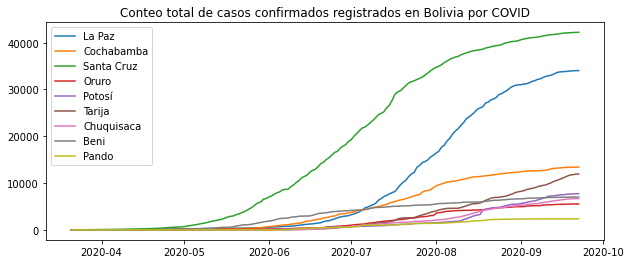

,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Tarija,Chuquisaca,Beni,Pando
Fecha,,,,,,,,,
2020-09-22,34030,13422,42226,5555,7736,11934,6696,7026,2361


In [5]:
## IMPRIMIENDO CASOS CONFIRMADOS
plt.figure(figsize=(10,4))
plt.title("Conteo total de casos confirmados registrados en Bolivia por COVID")
columns = list(confirmados_csv)
for i in columns:
    plt.plot(confirmados_csv[i], label=i)
plt.legend()
plt.show()
datosConfirmados = (confirmados_csv.tail(1))
datosConfirmados

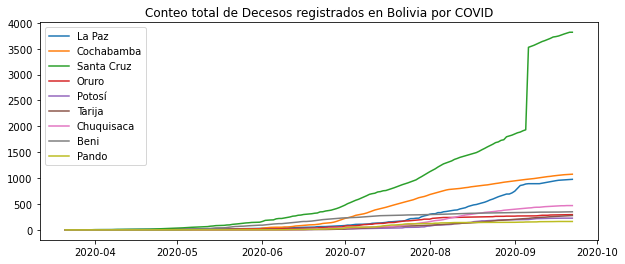

,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Tarija,Chuquisaca,Beni,Pando
Fecha,,,,,,,,,
2020-09-22,977,1076,3818,295,227,278,470,350,163


In [6]:
### IMPRIMIENDO DECESOS TOTALES
plt.figure(figsize=(10,4))
plt.title("Conteo total de Decesos registrados en Bolivia por COVID")
columns = list(decesos_csv)
for i in columns:
    plt.plot(decesos_csv[i], label=i)
plt.legend()
plt.show()
datosDecesos = (decesos_csv.tail(1))
datosDecesos


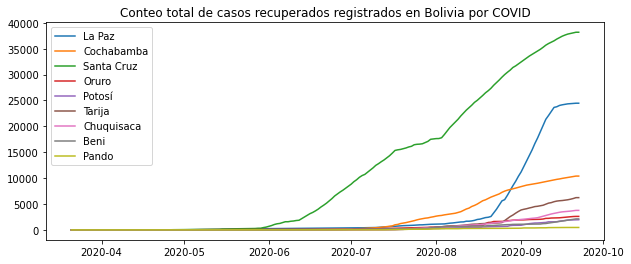

,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Tarija,Chuquisaca,Beni,Pando
Fecha,,,,,,,,,
2020-09-22,24473,10399,38181,2611,1967,6235,3773,2128,473


In [7]:
# IMPRIMIENDO CASOS RECUPERADOS
plt.figure(figsize=(10,4))
plt.title("Conteo total de casos recuperados registrados en Bolivia por COVID")
columns = list(recuperados_csv)
for i in columns:
    plt.plot(recuperados_csv[i], label=i)
plt.legend()
plt.show()
datosRecuperados = (recuperados_csv.tail(1))
datosRecuperados

In [8]:
#creando numpy arrays con la información
np_decesos = np.array(decesos_csv)
np_recuperados = np.array(recuperados_csv)
np_confirmados = np.array(confirmados_csv)

#calculamos datos diarios para decesos

for index in reversed(range(len(np_decesos))):
    if index >= 1 :
        np_decesos[index] = np_decesos[index] - np_decesos[index-1]

#calculamos datos diarios para recuperados
for index in reversed(range(len(np_recuperados))):
    if index >= 1 :
        np_recuperados[index] = np_recuperados[index] - np_recuperados[index-1]

#calculamos datos diarios para confirmados
for index in reversed(range(len(np_confirmados))):
    if index >= 1 :
        np_confirmados[index] = np_confirmados[index] - np_confirmados[index-1]

# seteando numpy para imprimir todos los valores de una matriz
np.set_printoptions(threshold=sys.maxsize)
np_confirmados


array([[   1,    2,    9,    8,    0,    0,    0,    0,    0],
       [   0,    1,    6,    0,    0,    0,    0,    0,    0],
       [   0,    0,    1,    0,    0,    0,    0,    0,    0],
       [   2,    0,    2,    0,    0,    0,    0,    0,    0],
       [   1,    0,    6,    0,    0,    0,    0,    0,    0],
       [   4,    7,   10,    0,    1,    0,    0,    0,    0],
       [   0,    4,    8,    0,    0,    0,    1,    0,    0],
       [   2,    0,    2,    0,    2,    0,    0,    0,    1],
       [   3,    4,    8,    0,    0,    0,    0,    0,    0],
       [   1,    2,    7,    0,    0,    1,    0,    0,    0],
       [   2,    0,    5,    0,    1,    0,    0,    0,    0],
       [   0,    1,    4,    0,    0,    0,    0,    0,    3],
       [   3,    1,    2,    0,    1,    0,    0,    0,    2],
       [   1,    2,    4,    0,    0,    0,    0,    0,    0],
       [   3,    1,   14,    0,    0,    0,    0,    0,    0],
       [   9,    8,    9,    0,    0,    0,    0,    0,

In [9]:
### creando nuevos panda dataframes desde los arrays numpy
df_decesos = pd.DataFrame(
    data=np_decesos,
    index=decesos_csv.index,
    columns = list(decesos_csv))
df_recuperados = pd.DataFrame(
    data=np_recuperados,
    index=recuperados_csv.index,
    columns = list(recuperados_csv))
df_confirmados = pd.DataFrame(
    data=np_confirmados,
    index=confirmados_csv.index,
    columns = list(confirmados_csv))

In [10]:
### seteando pandas para imprimir todos los valores de un dataframe
pd.set_option('display.max_rows', None)


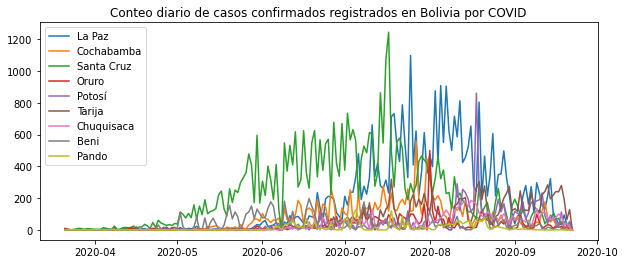

In [11]:
## IMPRIMIENDO CASOS POR DIA
plt.figure(figsize=(10,4))
plt.title("Conteo diario de casos confirmados registrados en Bolivia por COVID")
columns = list(df_confirmados)
for i in columns:
    plt.plot(df_confirmados[i], label=i)
plt.legend()
plt.show()

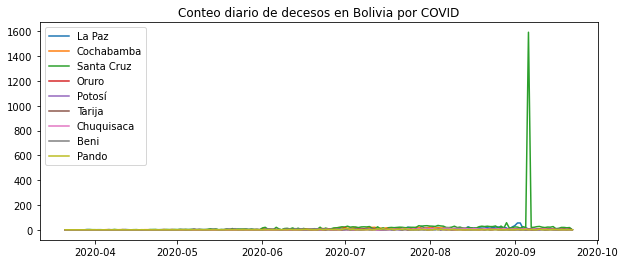

In [12]:
## IMPRIMIENDO DECESOS POR DIA
plt.figure(figsize=(10,4))
plt.title("Conteo diario de decesos en Bolivia por COVID")
columns = list(df_decesos)
for i in columns:
    #if i not in 'Santa Cruz':
    plt.plot(df_decesos[i], label=i)
plt.legend()
plt.show()
df_confirmados = (df_decesos.tail(1))

In [13]:
### BUSCANDO INFORMACIÓN ACERCA DEL PICO MAS ALTO
md_santa_cruz = df_decesos['Santa Cruz']
md_santa_cruz = md_santa_cruz.idxmax()
print(md_santa_cruz)
print(df_decesos.loc['2020-09-06'])
### REFERENCIAS ENCONTRADAS 
### https://brujuladigital.net/sociedad/santa-cruz-aumento-en-un-dia-1593-fallecidos-el-gobierno-pide-explicacion-porque-elevo-el-indice-de-letalidad

2020-09-06 00:00:00
La Paz           6
Cochabamba       5
Santa Cruz    1593
Oruro            0
Potosí           0
Tarija           4
Chuquisaca       2
Beni             0
Pando            0
Name: 2020-09-06 00:00:00, dtype: int64


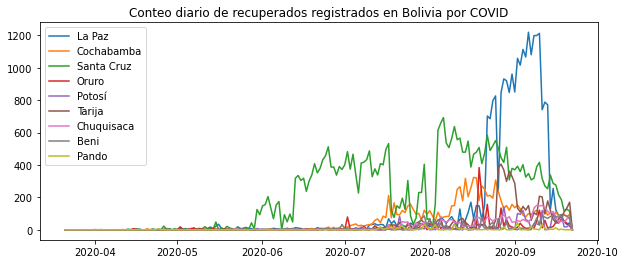

In [14]:
## IMPRIMIENDO RECUPERADOS POR DIA
plt.figure(figsize=(10,4))
plt.title("Conteo diario de recuperados registrados en Bolivia por COVID")
columns = list(df_recuperados)
for i in columns:
    plt.plot(df_recuperados[i], label=i)
plt.legend()
plt.show()